In [1]:
#%pip install yfinance pytrends pandas matplotlib seaborn requests beautifulsoup4

In [2]:
from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US', tz=360)
keywords = ['Power BI', 'Tableau', 'Cognos']

# Global trends
pytrends.build_payload(keywords, timeframe='2019-01-01 2024-12-31')
global_data = pytrends.interest_over_time()


In [3]:
global_data.head()


,Power BI,Tableau,Cognos,isPartial
date,,,,
2019-01-01,18,62,3,False
2019-02-01,21,62,3,False
2019-03-01,21,61,3,False
2019-04-01,22,59,2,False
2019-05-01,23,64,2,False


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
#from pytrends.request import TrendReq

# Initialize pytrends
pytrends = TrendReq(hl='en-US', tz=360)
keywords = ['Power BI', 'Tableau', 'Cognos']

# European countries with names
european_countries = {
    'DE': 'Germany',
    'FR': 'France', 
    'GB': 'United Kingdom',
    'IT': 'Italy',
    'ES': 'Spain'
}

In [5]:
print("=== GETTING EUROPEAN DATA ===")
print("This may take a few minutes due to rate limiting...")
print()

# Store data for each country
european_data = {}
european_summary = {}

# Get data for each European country
for country_code, country_name in european_countries.items():
    print(f"📍 Getting data for {country_name} ({country_code})...")
    
    try:
        # Build payload for this country
        pytrends.build_payload(keywords, 
                             geo=country_code, 
                             timeframe='2019-01-01 2024-12-31')
        
        # Get the data
        country_data = pytrends.interest_over_time()
        
        if not country_data.empty:
            # Store the full time series data
            european_data[country_name] = country_data[keywords].copy()
            
            # Calculate summary statistics for this country
            country_averages = country_data[keywords].mean()
            european_summary[country_name] = country_averages
            
            print(f"✅ {country_name}: Data collected successfully")
            print(f"   Power BI avg: {country_averages['Power BI']:.1f}")
            print(f"   Tableau avg: {country_averages['Tableau']:.1f}")  
            print(f"   Cognos avg: {country_averages['Cognos']:.1f}")
            print()
        else:
            print(f"❌ {country_name}: No data received")
            print()
            
    except Exception as e:
        print(f"❌ Error getting data for {country_name}: {e}")
        print()
    
    # Rate limiting - important to avoid being blocked
    time.sleep(2)

print("=== EUROPEAN DATA COLLECTION COMPLETE ===")
print()

=== GETTING EUROPEAN DATA ===
This may take a few minutes due to rate limiting...

📍 Getting data for Germany (DE)...
✅ Germany: Data collected successfully
   Power BI avg: 58.9
   Tableau avg: 37.2
   Cognos avg: 3.4

📍 Getting data for France (FR)...
✅ France: Data collected successfully
   Power BI avg: 1.5
   Tableau avg: 44.9
   Cognos avg: 0.0

📍 Getting data for United Kingdom (GB)...
✅ United Kingdom: Data collected successfully
   Power BI avg: 62.0
   Tableau avg: 29.8
   Cognos avg: 1.8

📍 Getting data for Italy (IT)...
✅ Italy: Data collected successfully
   Power BI avg: 51.9
   Tableau avg: 54.8
   Cognos avg: 1.6

📍 Getting data for Spain (ES)...
✅ Spain: Data collected successfully
   Power BI avg: 58.8
   Tableau avg: 22.1
   Cognos avg: 1.1

=== EUROPEAN DATA COLLECTION COMPLETE ===



In [6]:
# ============================================================================
# EUROPEAN ANALYSIS
# ============================================================================

if european_summary:
    # Convert summary to DataFrame
    eu_summary_df = pd.DataFrame(european_summary).T
    print("=== EUROPEAN SUMMARY (Average Search Interest 2019-2024) ===")
    print(eu_summary_df.round(1))
    print()
    
    # Calculate European market share by country
    print("=== EUROPEAN MARKET SHARE BY COUNTRY ===")
    for country in european_summary.keys():
        country_total = eu_summary_df.loc[country].sum()
        if country_total > 0:
            country_share = (eu_summary_df.loc[country] / country_total * 100).round(1)
            print(f"\n{country}:")
            for tool in keywords:
                print(f"  {tool}: {country_share[tool]}%")
    print()
    
    # Find country preferences
    print("=== COUNTRY TOOL PREFERENCES ===")
    for tool in keywords:
        top_country = eu_summary_df[tool].idxmax()
        top_value = eu_summary_df[tool].max()
        print(f"{tool}: Highest in {top_country} ({top_value:.1f})")
    print()
    
    # Compare Europe vs Global
    if 'global_data' in locals():
        print("=== EUROPE vs GLOBAL COMPARISON ===")
        global_averages = global_data[keywords].mean()
        eu_overall_avg = eu_summary_df.mean()
        
        print("Tool Preferences (Average Search Interest):")
        comparison_df = pd.DataFrame({
            'Global': global_averages,
            'European_Average': eu_overall_avg
        })
        print(comparison_df.round(1))
        print()
        
        # Calculate differences
        print("European vs Global Differences:")
        for tool in keywords:
            diff = eu_overall_avg[tool] - global_averages[tool]
            direction = "higher" if diff > 0 else "lower"
            print(f"{tool}: European interest is {abs(diff):.1f} points {direction} than global")
        print()

=== EUROPEAN SUMMARY (Average Search Interest 2019-2024) ===
                Power BI  Tableau  Cognos
Germany             58.9     37.2     3.4
France               1.5     44.9     0.0
United Kingdom      62.0     29.8     1.8
Italy               51.9     54.8     1.6
Spain               58.8     22.1     1.1

=== EUROPEAN MARKET SHARE BY COUNTRY ===

Germany:
  Power BI: 59.2%
  Tableau: 37.4%
  Cognos: 3.4%

France:
  Power BI: 3.2%
  Tableau: 96.8%
  Cognos: 0.0%

United Kingdom:
  Power BI: 66.2%
  Tableau: 31.9%
  Cognos: 1.9%

Italy:
  Power BI: 47.9%
  Tableau: 50.6%
  Cognos: 1.5%

Spain:
  Power BI: 71.7%
  Tableau: 27.0%
  Cognos: 1.3%

=== COUNTRY TOOL PREFERENCES ===
Power BI: Highest in United Kingdom (62.0)
Tableau: Highest in Italy (54.8)
Cognos: Highest in Germany (3.4)

=== EUROPE vs GLOBAL COMPARISON ===
Tool Preferences (Average Search Interest):
          Global  European_Average
Power BI    36.6              46.6
Tableau     62.6              37.8
Cognos       1.

=== CREATING EUROPEAN VISUALIZATIONS ===


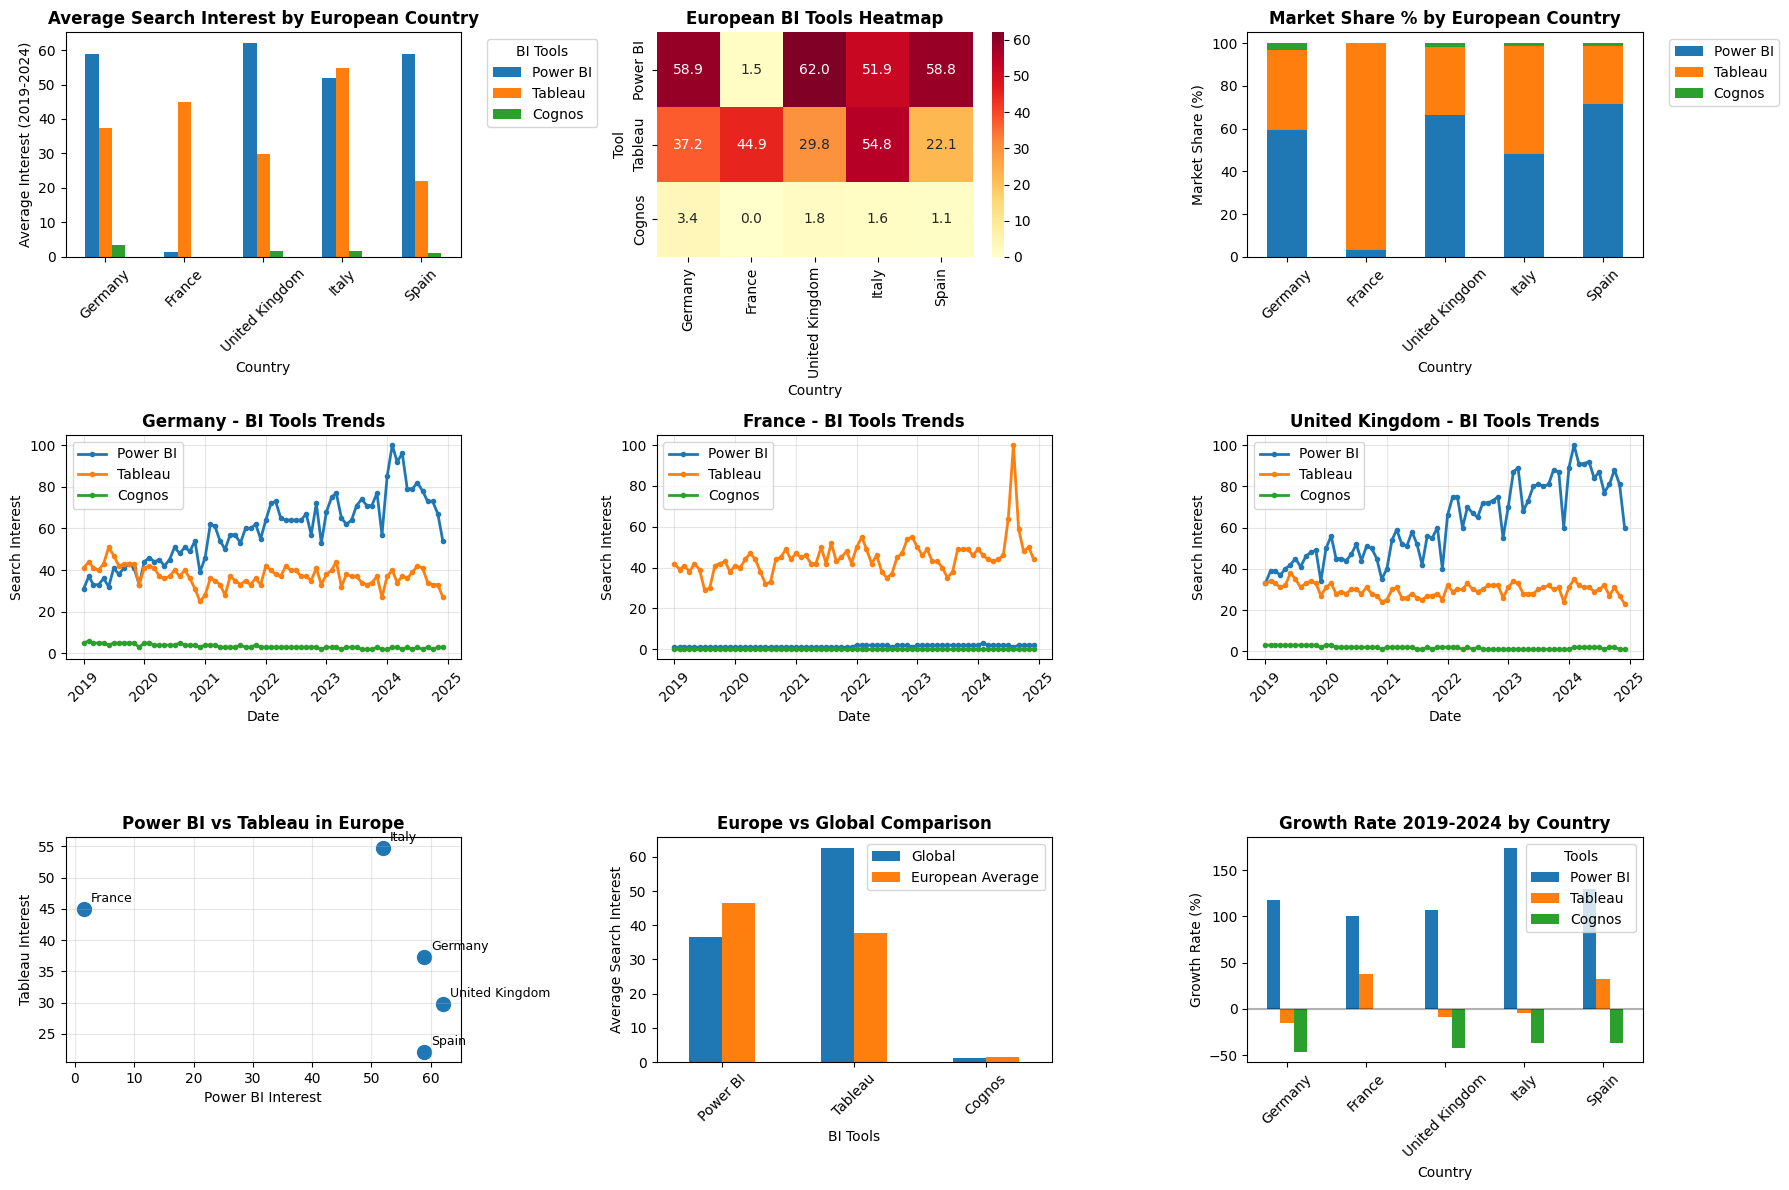

In [7]:
# ============================================================================
# EUROPEAN VISUALIZATIONS
# ============================================================================

if european_data:
    print("=== CREATING EUROPEAN VISUALIZATIONS ===")
    
    # Set up the plotting
    plt.figure(figsize=(18, 12))
    
    # 1. European Country Comparison (Bar Chart)
    plt.subplot(3, 3, 1)
    eu_summary_df.plot(kind='bar', ax=plt.gca())
    plt.title('Average Search Interest by European Country', fontweight='bold')
    plt.xlabel('Country')
    plt.ylabel('Average Interest (2019-2024)')
    plt.legend(title='BI Tools', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    
    # 2. Tool Popularity Heatmap
    plt.subplot(3, 3, 2)
    sns.heatmap(eu_summary_df.T, annot=True, fmt='.1f', cmap='YlOrRd', ax=plt.gca())
    plt.title('European BI Tools Heatmap', fontweight='bold')
    plt.xlabel('Country')
    plt.ylabel('Tool')
    
    # 3. Market Share by Country (Stacked Bar)
    plt.subplot(3, 3, 3)
    market_share_eu = eu_summary_df.div(eu_summary_df.sum(axis=1), axis=0) * 100
    market_share_eu.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title('Market Share % by European Country', fontweight='bold')
    plt.xlabel('Country')
    plt.ylabel('Market Share (%)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    
    # 4-6. Individual country trends (if we have time series data)
    subplot_positions = [(3, 3, 4), (3, 3, 5), (3, 3, 6)]
    countries_to_plot = list(european_data.keys())[:3]  # First 3 countries
    
    for i, (country, data) in enumerate(list(european_data.items())[:3]):
        plt.subplot(*subplot_positions[i])
        for tool in keywords:
            plt.plot(data.index, data[tool], label=tool, linewidth=2, marker='o', markersize=3)
        plt.title(f'{country} - BI Tools Trends', fontweight='bold')
        plt.xlabel('Date')
        plt.ylabel('Search Interest')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.xticks(rotation=45)
    
    # 7. Power BI vs Tableau in Europe
    plt.subplot(3, 3, 7)
    powerbi_tableau = eu_summary_df[['Power BI', 'Tableau']]
    powerbi_tableau.plot(kind='scatter', x='Power BI', y='Tableau', s=100, ax=plt.gca())
    
    # Add country labels
    for idx, country in enumerate(powerbi_tableau.index):
        plt.annotate(country, 
                    (powerbi_tableau.iloc[idx]['Power BI'], powerbi_tableau.iloc[idx]['Tableau']),
                    xytext=(5, 5), textcoords='offset points', fontsize=9)
    
    plt.title('Power BI vs Tableau in Europe', fontweight='bold')
    plt.xlabel('Power BI Interest')
    plt.ylabel('Tableau Interest')
    plt.grid(True, alpha=0.3)
    
    # 8. European vs Global Comparison
    if 'global_data' in locals():
        plt.subplot(3, 3, 8)
        global_avg = global_data[keywords].mean()
        eu_avg = eu_summary_df.mean()
        
        comparison_data = pd.DataFrame({
            'Global': global_avg,
            'European Average': eu_avg
        })
        comparison_data.plot(kind='bar', ax=plt.gca())
        plt.title('Europe vs Global Comparison', fontweight='bold')
        plt.xlabel('BI Tools')
        plt.ylabel('Average Search Interest')
        plt.legend()
        plt.xticks(rotation=45)
    
    # 9. Growth Analysis by Country (if we have sufficient data)
    plt.subplot(3, 3, 9)
    # Calculate 2019 vs 2024 growth for each country
    growth_by_country = {}
    for country, data in european_data.items():
        if len(data) > 50:  # Ensure we have enough data points
            data_2019 = data[data.index.year == 2019].mean()
            data_2024 = data[data.index.year == 2024].mean()
            growth = ((data_2024 - data_2019) / data_2019 * 100).fillna(0)
            growth_by_country[country] = growth
    
    if growth_by_country:
        growth_df = pd.DataFrame(growth_by_country).T
        growth_df.plot(kind='bar', ax=plt.gca())
        plt.title('Growth Rate 2019-2024 by Country', fontweight='bold')
        plt.xlabel('Country')
        plt.ylabel('Growth Rate (%)')
        plt.legend(title='Tools')
        plt.xticks(rotation=45)
        plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

In [8]:
 eu_summary_df

,Power BI,Tableau,Cognos
Germany,58.930556,37.250000,3.416667
France,1.472222,44.944444,0.000000
United Kingdom,62.027778,29.847222,1.805556
Italy,51.916667,54.791667,1.638889
Spain,58.833333,22.111111,1.097222


In [9]:

# ============================================================================
# SAVE EUROPEAN DATA
# ============================================================================

if european_summary:
    # Save summary data
    eu_summary_df.index.name = 'Country'
    eu_summary_df.to_csv('european_bi_tools_summary.csv')
    
    # Save market share data
    if 'market_share_eu' in locals():
        market_share_eu.index.name = 'Country'
        market_share_eu.to_csv('european_market_share.csv')
    
    # Save individual country data
    for country, data in european_data.items():
        filename = f'bi_tools_{country.lower().replace(" ", "_")}.csv'
        data.to_csv(filename)
    
    print("📁 European data saved to CSV files!")
    print("🎯 Ready for dashboard creation!")


# Save to files
global_data.to_csv('bi_tools_complete_trends_data.csv')


📁 European data saved to CSV files!
🎯 Ready for dashboard creation!


In [10]:

# ============================================================================
# KEY EUROPEAN INSIGHTS
# ============================================================================

if european_summary:
    print("\n=== KEY EUROPEAN INSIGHTS ===")
    
    # Most Power BI friendly country
    powerbi_leader = eu_summary_df['Power BI'].idxmax()
    powerbi_value = eu_summary_df['Power BI'].max()
    print(f"🥇 Most Power BI interest: {powerbi_leader} ({powerbi_value:.1f})")
    
    # Most Tableau friendly country  
    tableau_leader = eu_summary_df['Tableau'].idxmax()
    tableau_value = eu_summary_df['Tableau'].max()
    print(f"🥇 Most Tableau interest: {tableau_leader} ({tableau_value:.1f})")
    
    # Most Cognos friendly country
    cognos_leader = eu_summary_df['Cognos'].idxmax()
    cognos_value = eu_summary_df['Cognos'].max()
    print(f"🥇 Most Cognos interest: {cognos_leader} ({cognos_value:.1f})")
    
    # Overall European preferences
    eu_total_avg = eu_summary_df.mean()
    eu_leader = eu_total_avg.idxmax()
    print(f"\n🇪🇺 Overall European preference: {eu_leader}")
    
    print("\n=== BUSINESS IMPLICATIONS ===")
    print("• Regional preferences vary significantly across Europe")
    print("• Market entry strategies should be country-specific")  
    print("• Training and certification programs should reflect local preferences")
    print("• Sales territories may benefit from tool-specific specialization")

else:
    print("❌ No European data collected. Check your internet connection and try again.")


=== KEY EUROPEAN INSIGHTS ===
🥇 Most Power BI interest: United Kingdom (62.0)
🥇 Most Tableau interest: Italy (54.8)
🥇 Most Cognos interest: Germany (3.4)

🇪🇺 Overall European preference: Power BI

=== BUSINESS IMPLICATIONS ===
• Regional preferences vary significantly across Europe
• Market entry strategies should be country-specific
• Training and certification programs should reflect local preferences
• Sales territories may benefit from tool-specific specialization


In [11]:
# Add this to get business context
import yfinance as yf
companies = {'MSFT': 'Microsoft', 'CRM': 'Salesforce', 'IBM': 'IBM'}
#stock_data = yf.download(list(companies.keys()), start="2019-01-01")

In [12]:
#stock_data

In [13]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np

# ============================================================================
# STOCK DATA FOR BI TOOLS PARENT COMPANIES
# ============================================================================

print("=== DOWNLOADING STOCK DATA FOR BI TOOLS PARENT COMPANIES ===")
print()

# Parent companies mapping
companies = {
    'MSFT': 'Microsoft (Power BI)',
    'CRM': 'Salesforce (Tableau)', 
    'IBM': 'IBM (Cognos)'
}

# Download stock data for the same period as your trends analysis
start_date = "2019-01-01"
end_date = datetime.now().strftime("%Y-%m-%d")

print(f"Downloading stock data from {start_date} to {end_date}...")
print()

# Get historical stock data
stock_data = yf.download(list(companies.keys()), start=start_date, end=end_date)

# Get individual company info
company_info = {}
for ticker in companies.keys():
    try:
        stock = yf.Ticker(ticker)
        info = stock.info
        company_info[ticker] = {
            'name': info.get('longName', companies[ticker]),
            'current_price': info.get('currentPrice', 0),
            'market_cap': info.get('marketCap', 0),
            'pe_ratio': info.get('trailingPE', 0),
            'dividend_yield': info.get('dividendYield', 0),
            'beta': info.get('beta', 0)
        }
        print(f"✅ {companies[ticker]}: ${info.get('currentPrice', 0):.2f}")
    except Exception as e:
        print(f"❌ Error getting info for {ticker}: {e}")

print("\n" + "="*60)


=== DOWNLOADING STOCK DATA FOR BI TOOLS PARENT COMPANIES ===


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed


✅ Microsoft (Power BI): $476.19
✅ Salesforce (Tableau): $262.36
✅ IBM (Cognos): $285.51



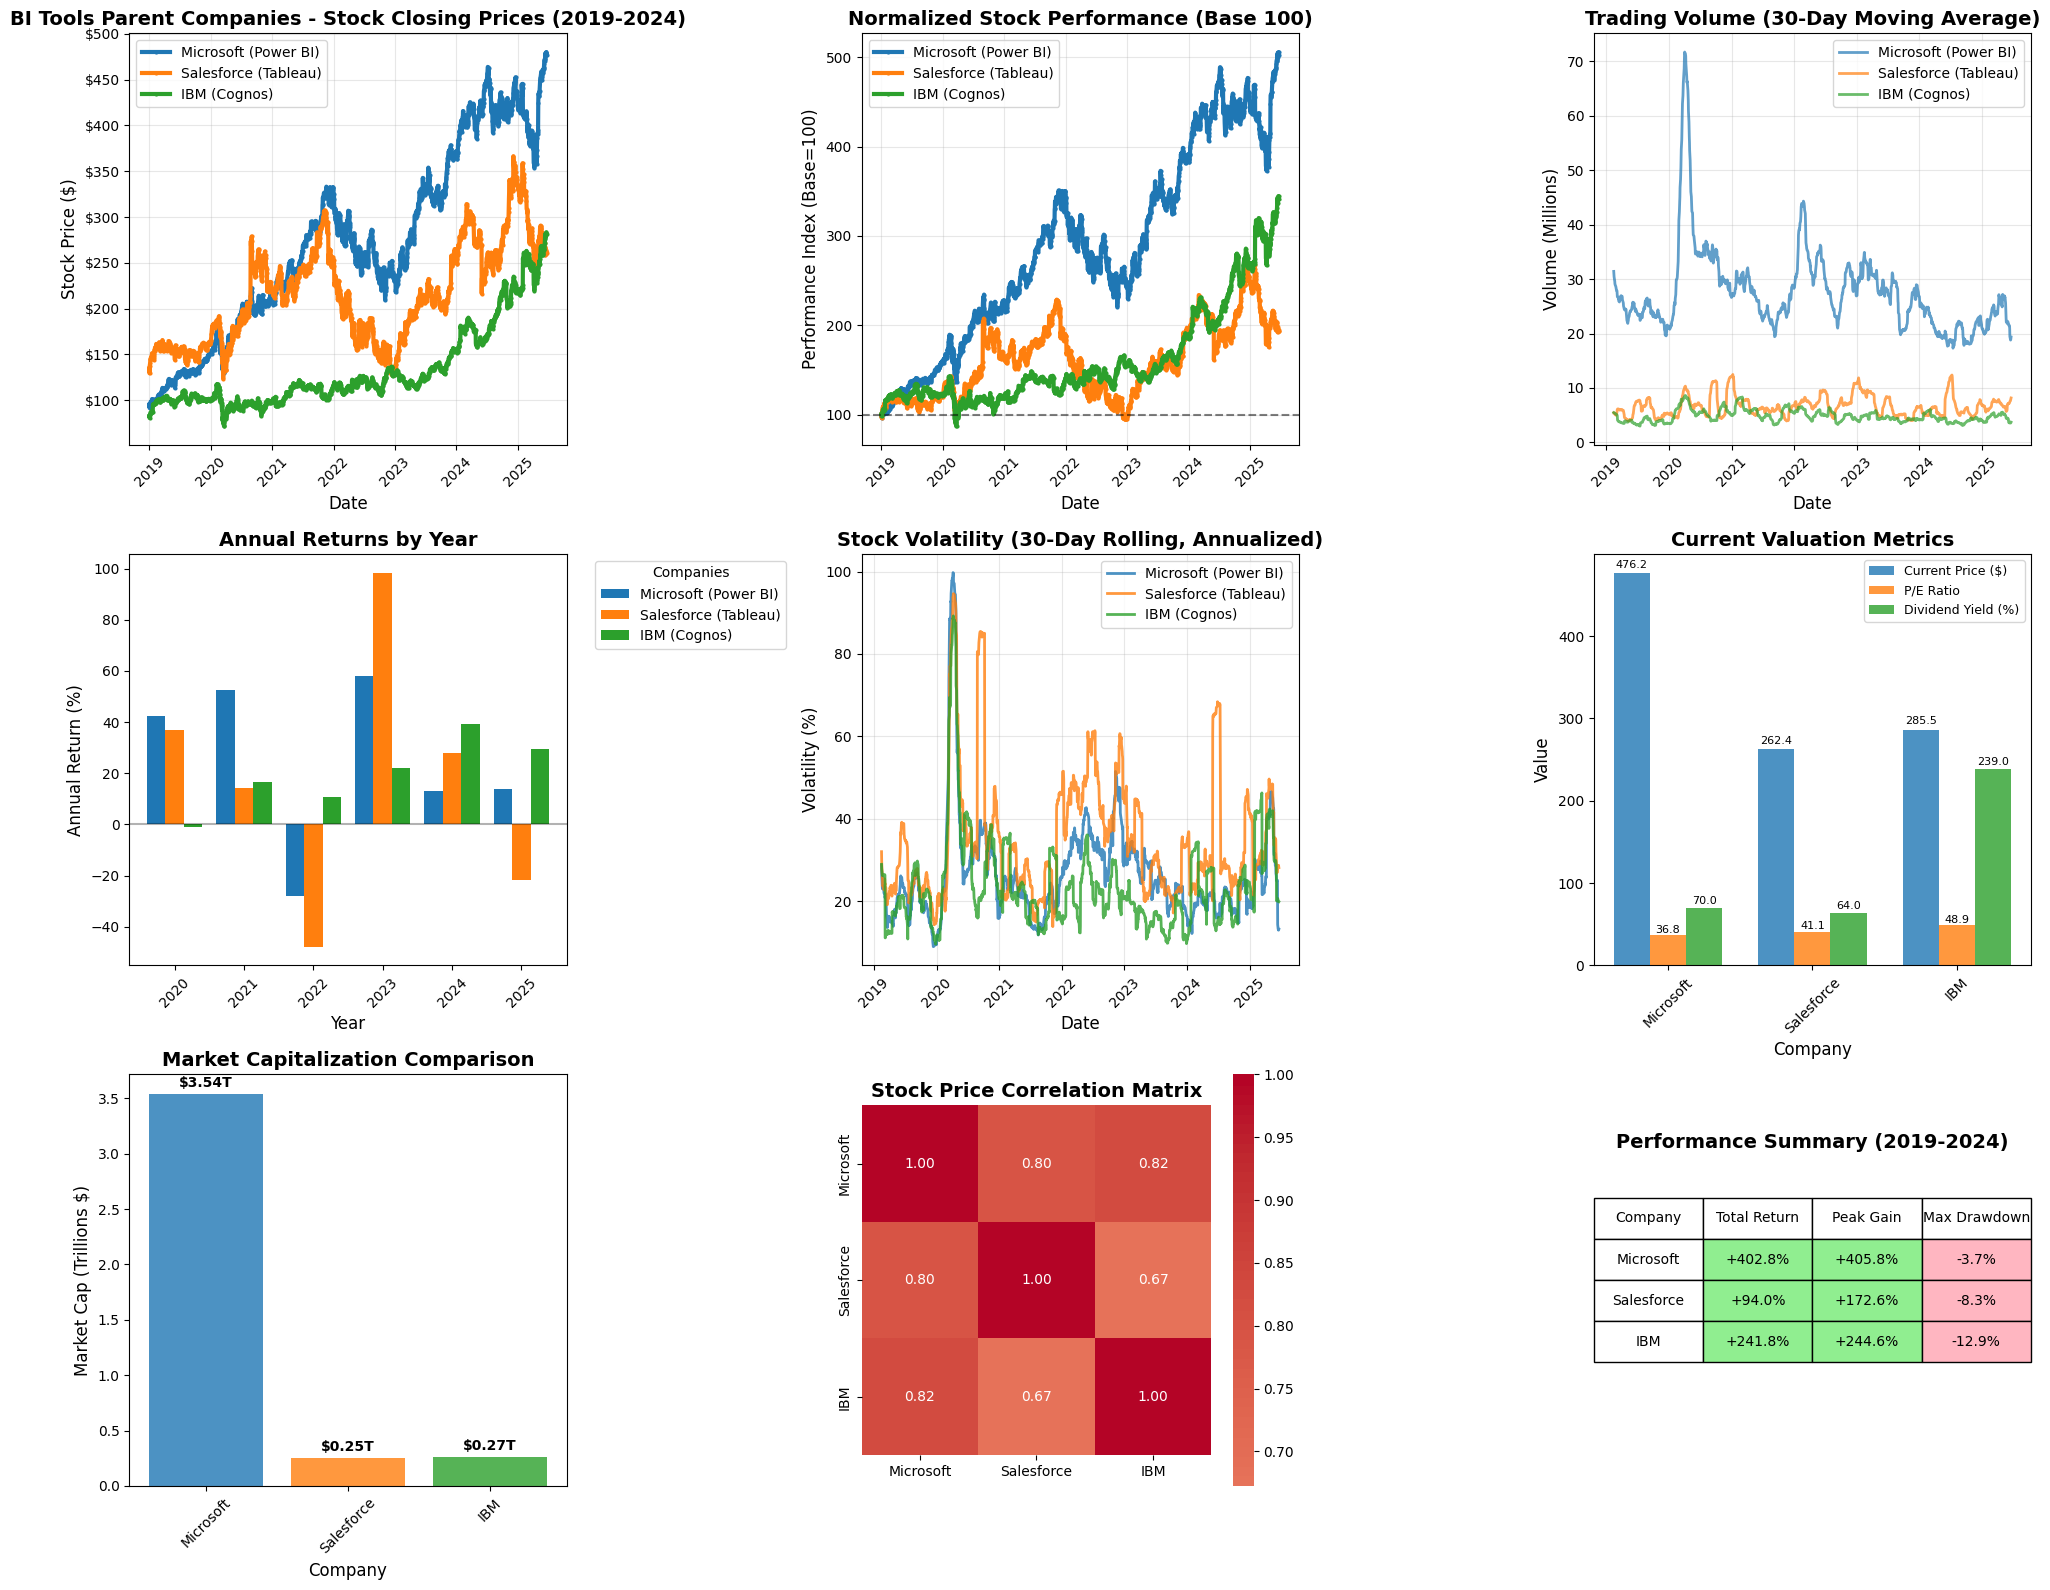

In [14]:

# ============================================================================
# STOCK PRICE VISUALIZATIONS
# ============================================================================

# Create comprehensive stock analysis
plt.figure(figsize=(20, 16))

# 1. MAIN LINE CHART - CLOSING PRICES
plt.subplot(3, 3, 1)
for ticker in companies.keys():
    if 'Close' in stock_data.columns:
        if stock_data['Close'][ticker].notna().any():
            plt.plot(stock_data.index, stock_data['Close'][ticker], 
                    linewidth=3, label=companies[ticker], marker='o', markersize=2)

plt.title('BI Tools Parent Companies - Stock Closing Prices (2019-2024)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price ($)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Format y-axis to show dollar signs
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:.0f}'))

# 2. NORMALIZED PERFORMANCE (Starting from 100)
plt.subplot(3, 3, 2)
normalized_data = pd.DataFrame()

for ticker in companies.keys():
    if 'Close' in stock_data.columns and stock_data['Close'][ticker].notna().any():
        # Normalize to 100 at the start
        price_series = stock_data['Close'][ticker].dropna()
        if len(price_series) > 0:
            normalized_series = (price_series / price_series.iloc[0]) * 100
            normalized_data[companies[ticker]] = normalized_series

if not normalized_data.empty:
    for column in normalized_data.columns:
        plt.plot(normalized_data.index, normalized_data[column], 
                linewidth=3, label=column, marker='o', markersize=2)

plt.title('Normalized Stock Performance (Base 100)', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Performance Index (Base=100)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.axhline(y=100, color='black', linestyle='--', alpha=0.5)
plt.xticks(rotation=45)

# 3. VOLUME ANALYSIS
plt.subplot(3, 3, 3)
for ticker in companies.keys():
    if 'Volume' in stock_data.columns and stock_data['Volume'][ticker].notna().any():
        # Calculate rolling average to smooth the data
        volume_ma = stock_data['Volume'][ticker].rolling(window=30).mean()
        plt.plot(volume_ma.index, volume_ma/1e6, 
                linewidth=2, label=companies[ticker], alpha=0.7)

plt.title('Trading Volume (30-Day Moving Average)', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volume (Millions)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# 4. YEARLY RETURNS COMPARISON
plt.subplot(3, 3, 4)
yearly_returns = {}

for ticker in companies.keys():
    if 'Close' in stock_data.columns and stock_data['Close'][ticker].notna().any():
        prices = stock_data['Close'][ticker].dropna()
        if len(prices) > 0:
            # Calculate yearly returns
            yearly_data = prices.resample('Y').last()
            yearly_change = yearly_data.pct_change().dropna() * 100
            yearly_returns[companies[ticker]] = yearly_change

if yearly_returns:
    yearly_df = pd.DataFrame(yearly_returns)
    yearly_df.index = yearly_df.index.year
    
    yearly_df.plot(kind='bar', ax=plt.gca(), width=0.8)
    plt.title('Annual Returns by Year', fontsize=14, fontweight='bold')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Annual Return (%)', fontsize=12)
    plt.legend(title='Companies', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    plt.xticks(rotation=45)

# 5. VOLATILITY ANALYSIS
plt.subplot(3, 3, 5)
volatility_data = {}

for ticker in companies.keys():
    if 'Close' in stock_data.columns and stock_data['Close'][ticker].notna().any():
        prices = stock_data['Close'][ticker].dropna()
        if len(prices) > 0:
            # Calculate daily returns
            daily_returns = prices.pct_change().dropna()
            # Calculate rolling 30-day volatility (annualized)
            rolling_vol = daily_returns.rolling(window=30).std() * np.sqrt(252) * 100
            volatility_data[companies[ticker]] = rolling_vol

if volatility_data:
    vol_df = pd.DataFrame(volatility_data)
    for column in vol_df.columns:
        plt.plot(vol_df.index, vol_df[column], linewidth=2, label=column, alpha=0.8)

plt.title('Stock Volatility (30-Day Rolling, Annualized)', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volatility (%)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# 6. CURRENT VALUATION METRICS
plt.subplot(3, 3, 6)
if company_info:
    metrics = ['current_price', 'pe_ratio', 'dividend_yield']
    metric_names = ['Current Price ($)', 'P/E Ratio', 'Dividend Yield (%)']
    
    fig_data = []
    companies_list = []
    
    for ticker, info in company_info.items():
        if info['current_price'] > 0:
            fig_data.append([
                info['current_price'],
                info['pe_ratio'] if info['pe_ratio'] else 0,
                info['dividend_yield'] * 100 if info['dividend_yield'] else 0
            ])
            companies_list.append(companies[ticker].split(' (')[0])  # Just company name
    
    if fig_data:
        x = np.arange(len(companies_list))
        width = 0.25
        
        for i, metric in enumerate(metric_names):
            values = [row[i] for row in fig_data]
            plt.bar(x + i*width, values, width, label=metric, alpha=0.8)
            
            # Add value labels on bars
            for j, v in enumerate(values):
                if v > 0:
                    plt.text(x[j] + i*width, v + max(values)*0.01, f'{v:.1f}', 
                            ha='center', va='bottom', fontsize=8)
        
        plt.title('Current Valuation Metrics', fontsize=14, fontweight='bold')
        plt.xlabel('Company', fontsize=12)
        plt.ylabel('Value', fontsize=12)
        plt.legend(fontsize=9)
        plt.xticks(x + width, companies_list, rotation=45)

# 7. MARKET CAPITALIZATION COMPARISON
plt.subplot(3, 3, 7)
if company_info:
    market_caps = []
    company_names = []
    
    for ticker, info in company_info.items():
        if info['market_cap'] > 0:
            market_caps.append(info['market_cap'] / 1e12)  # Convert to trillions
            company_names.append(companies[ticker].split(' (')[0])
    
    if market_caps:
        colors = ['#1f77b4', '#ff7f0e', '#2ca02c'][:len(market_caps)]
        bars = plt.bar(company_names, market_caps, color=colors, alpha=0.8)
        
        plt.title('Market Capitalization Comparison', fontsize=14, fontweight='bold')
        plt.xlabel('Company', fontsize=12)
        plt.ylabel('Market Cap (Trillions $)', fontsize=12)
        plt.xticks(rotation=45)
        
        # Add value labels on bars
        for bar, value in zip(bars, market_caps):
            plt.text(bar.get_x() + bar.get_width()/2, value + max(market_caps)*0.01, 
                    f'${value:.2f}T', ha='center', va='bottom', fontweight='bold')

# 8. PRICE CORRELATION HEATMAP
plt.subplot(3, 3, 8)
if 'Close' in stock_data.columns:
    # Create correlation matrix of closing prices
    close_prices = pd.DataFrame()
    for ticker in companies.keys():
        if stock_data['Close'][ticker].notna().any():
            close_prices[companies[ticker].split(' (')[0]] = stock_data['Close'][ticker]
    
    if not close_prices.empty:
        correlation_matrix = close_prices.corr()
        
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                   square=True, fmt='.2f', ax=plt.gca())
        plt.title('Stock Price Correlation Matrix', fontsize=14, fontweight='bold')

# 9. PERFORMANCE SUMMARY TABLE
plt.subplot(3, 3, 9)
plt.axis('off')  # Turn off axes for text display

if not normalized_data.empty:
    # Calculate performance metrics
    performance_summary = []
    
    for column in normalized_data.columns:
        series = normalized_data[column].dropna()
        if len(series) > 0:
            total_return = (series.iloc[-1] - 100)
            max_value = series.max() - 100
            min_value = series.min() - 100
            
            performance_summary.append([
                column.split(' (')[0],
                f"{total_return:+.1f}%",
                f"{max_value:+.1f}%", 
                f"{min_value:+.1f}%"
            ])
    
    if performance_summary:
        # Create table
        table_data = performance_summary
        headers = ['Company', 'Total Return', 'Peak Gain', 'Max Drawdown']
        
        table = plt.table(cellText=table_data, colLabels=headers,
                         cellLoc='center', loc='center',
                         bbox=[0, 0.3, 1, 0.4])
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1, 2)
        
        # Color code the cells
        for i in range(1, len(table_data) + 1):
            for j in range(1, 4):  # Return columns
                cell_value = table_data[i-1][j]
                if '+' in cell_value:
                    table[(i, j)].set_facecolor('#90EE90')  # Light green
                elif '-' in cell_value:
                    table[(i, j)].set_facecolor('#FFB6C1')  # Light red
        
        plt.title('Performance Summary (2019-2024)', fontsize=14, fontweight='bold', y=0.8)

plt.tight_layout()
plt.show()


In [15]:

# ============================================================================
# STOCK DATA SUMMARY & INSIGHTS
# ============================================================================

print("\n=== STOCK ANALYSIS SUMMARY ===")
print()

if company_info:
    print("Current Company Valuations:")
    for ticker, info in company_info.items():
        print(f"\n{companies[ticker]}:")
        print(f"  💰 Current Price: ${info['current_price']:.2f}")
        print(f"  🏢 Market Cap: ${info['market_cap']/1e9:.1f}B")
        if info['pe_ratio']:
            print(f"  📊 P/E Ratio: {info['pe_ratio']:.1f}")
        if info['dividend_yield']:
            print(f"  💵 Dividend Yield: {info['dividend_yield']*100:.2f}%")
        if info['beta']:
            print(f"  📈 Beta: {info['beta']:.2f}")

# Calculate total returns
if not normalized_data.empty:
    print(f"\n=== TOTAL RETURNS (2019-2024) ===")
    for column in normalized_data.columns:
        series = normalized_data[column].dropna()
        if len(series) > 0:
            total_return = series.iloc[-1] - 100
            company_name = column.split(' (')[0]
            print(f"{company_name}: {total_return:+.1f}%")

print(f"\n=== BUSINESS INTELLIGENCE INSIGHTS ===")
print("• Stock performance can indicate parent company health")
print("• Higher valuations suggest stronger market confidence")
print("• Correlation between companies shows market interdependence")  
print("• Performance trends may influence BI tool development investment")

# Save stock data for dashboard
if 'Close' in stock_data.columns:
    stock_close_data = pd.DataFrame()
    for ticker in companies.keys():
        if stock_data['Close'][ticker].notna().any():
            stock_close_data[companies[ticker]] = stock_data['Close'][ticker]
    
    stock_close_data.to_csv('bi_tools_stock_prices.csv')
    
if not normalized_data.empty:
    normalized_data.to_csv('bi_tools_stock_performance.csv')

print(f"\n📁 Stock data saved to CSV files!")
print(f"🎯 Ready to integrate with  BI tools trend analysis!")


=== STOCK ANALYSIS SUMMARY ===

Current Company Valuations:

Microsoft (Power BI):
  💰 Current Price: $476.19
  🏢 Market Cap: $3539.3B
  📊 P/E Ratio: 36.8
  💵 Dividend Yield: 70.00%
  📈 Beta: 1.03

Salesforce (Tableau):
  💰 Current Price: $262.36
  🏢 Market Cap: $250.8B
  📊 P/E Ratio: 41.1
  💵 Dividend Yield: 64.00%
  📈 Beta: 1.38

IBM (Cognos):
  💰 Current Price: $285.51
  🏢 Market Cap: $265.4B
  📊 P/E Ratio: 48.9
  💵 Dividend Yield: 239.00%
  📈 Beta: 0.65

=== TOTAL RETURNS (2019-2024) ===
Microsoft: +402.8%
Salesforce: +94.0%
IBM: +241.8%

=== BUSINESS INTELLIGENCE INSIGHTS ===
• Stock performance can indicate parent company health
• Higher valuations suggest stronger market confidence
• Correlation between companies shows market interdependence
• Performance trends may influence BI tool development investment

📁 Stock data saved to CSV files!
🎯 Ready to integrate with  BI tools trend analysis!


In [16]:
# Create data for Google Looker Studio Global vs European comparison
import pandas as pd

# ============================================================================
# STEP 1: CREATE THE COMPARISON DATA (Same as your matplotlib code)
# ============================================================================

# Load your data
global_data = pd.read_csv('bi_tools_complete_trends_data.csv', index_col=0)
eu_summary_df = pd.read_csv('european_bi_tools_summary.csv', index_col=0)

keywords = ['Power BI', 'Tableau', 'Cognos']

# Calculate averages (exactly like your matplotlib code)
global_avg = global_data[keywords].mean()
eu_avg = eu_summary_df.mean()

# Create comparison dataframe
comparison_data = pd.DataFrame({
    'Global': global_avg,
    'European_Average': eu_avg
})

print("=== COMPARISON DATA ===")
print(comparison_data.round(1))
print()

# ============================================================================
# STEP 2: RESHAPE FOR GOOGLE LOOKER STUDIO
# ============================================================================

# Looker Studio works better with "long" format data
# Transform from wide to long format

# Method 1: Simple format (2 separate rows per tool)
looker_data_method1 = []

for tool in keywords:
    # Global row
    looker_data_method1.append({
        'BI_Tool': tool.replace(' ', '_'),  # Clean name
        'Region': 'Global',
        'Average_Search_Interest': global_avg[tool]
    })
    
    # European row  
    looker_data_method1.append({
        'BI_Tool': tool.replace(' ', '_'),  # Clean name
        'Region': 'European_Average', 
        'Average_Search_Interest': eu_avg[tool]
    })

looker_df_method1 = pd.DataFrame(looker_data_method1)

print("=== LOOKER STUDIO DATA FORMAT (Method 1) ===")
print(looker_df_method1)
print()

# Method 2: Side-by-side columns (alternative)
looker_data_method2 = []

for tool in keywords:
    looker_data_method2.append({
        'BI_Tool': tool.replace(' ', '_'),
        'Global_Average': global_avg[tool],
        'European_Average': eu_avg[tool],
        'Difference': eu_avg[tool] - global_avg[tool],
        'Percent_Difference': ((eu_avg[tool] - global_avg[tool]) / global_avg[tool] * 100) if global_avg[tool] > 0 else 0
    })

looker_df_method2 = pd.DataFrame(looker_data_method2)

print("=== LOOKER STUDIO DATA FORMAT (Method 2) ===")
print(looker_df_method2.round(1))
print()

# ============================================================================
# STEP 3: SAVE FOR GOOGLE LOOKER STUDIO UPLOAD
# ============================================================================

# Save both formats
looker_df_method1.to_csv('global_vs_european_comparison_long.csv', index=False)
looker_df_method2.to_csv('global_vs_european_comparison_wide.csv', index=False)

print("✅ Data saved for Looker Studio:")
print("📁 global_vs_european_comparison_long.csv")
print("📁 global_vs_european_comparison_wide.csv")
print()

# ============================================================================
# STEP 4: SHOW RECOMMENDED DATA STRUCTURE
# ============================================================================

print("🎯 RECOMMENDED FOR LOOKER STUDIO:")
print("Use: global_vs_european_comparison_long.csv")
print()
print("This format works best for:")
print("• Grouped/clustered bar charts")
print("• Easy filtering by Region")
print("• Clear legend separation")
print()

print("📊 SAMPLE DATA PREVIEW:")
print(looker_df_method1.head(6))

=== COMPARISON DATA ===
          Global  European_Average
Power BI    36.6              46.6
Tableau     62.6              37.8
Cognos       1.3               1.6

=== LOOKER STUDIO DATA FORMAT (Method 1) ===
    BI_Tool            Region  Average_Search_Interest
0  Power_BI            Global                36.597222
1  Power_BI  European_Average                46.636111
2   Tableau            Global                62.555556
3   Tableau  European_Average                37.788889
4    Cognos            Global                 1.319444
5    Cognos  European_Average                 1.591667

=== LOOKER STUDIO DATA FORMAT (Method 2) ===
    BI_Tool  Global_Average  European_Average  Difference  Percent_Difference
0  Power_BI            36.6              46.6        10.0                27.4
1   Tableau            62.6              37.8       -24.8               -39.6
2    Cognos             1.3               1.6         0.3                20.6

✅ Data saved for Looker Studio:
📁 global_vs_eu